# Forest aboveground biomass

In [6]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path

# Import functions from geo_tools module
from geo_tools import plot_iso_forest, utils

# Reloads module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Output directory

In [2]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [3]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [4]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution

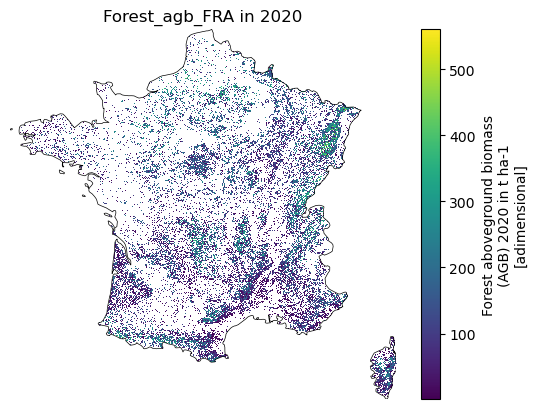

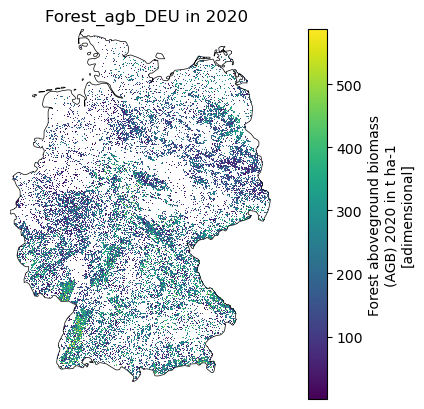

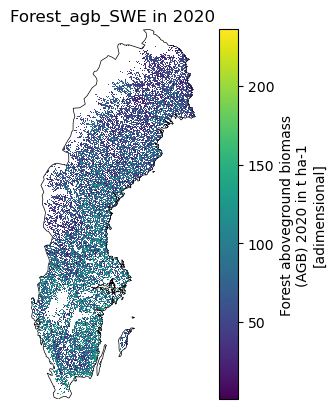

In [10]:
# Testing plot_iso_forest for many countries at once
for iso in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest(
        iso_code=iso,
        xarray_id="Forest_agb"
    )

# Forest aboveground biomass on average in EU countries

In [19]:
# Template to store country results in t/ha
forest_agb_avg = []

for iso in eu_iso:
    # Average biomass
    iso_agb_avg = plot_iso_forest.average_values(
        iso_code=iso, 
        xarray_id="Forest_agb", 
        forest_layer_year=2020
    )

    forest_agb_avg.append(iso_agb_avg)

forest_agb_df = pd.concat(forest_agb_avg)

In [20]:
forest_agb_df

,Region,Variable,Year,Unit,Value
0,BGR,Forest agb,2020,t/ha,105.036789
0,CYP,Forest agb,2020,t/ha,63.124489
0,DNK,Forest agb,2020,t/ha,112.524261
0,IRL,Forest agb,2020,t/ha,103.941559
0,EST,Forest agb,2020,t/ha,142.435379
0,AUT,Forest agb,2020,t/ha,190.935379
0,CZE,Forest agb,2020,t/ha,200.040619
0,FIN,Forest agb,2020,t/ha,75.716011
0,FRA,Forest agb,2020,t/ha,120.297981
0,DEU,Forest agb,2020,t/ha,188.362686


# Exporting average aboveground biomass

In [21]:
forest_agb_df.to_csv(output_data_dir/"iso_forest_agb.csv")

# Differentiating classes for aboveground biomass

In [10]:
%%time

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv").drop(["Unnamed: 0"], axis=1)

# Template to store country results in Mha
abg_class_mha = []

# Template to store country results in percentage share
abg_class_perc = []

for iso in eu_iso:

    # Calculate areas for each class
    iso_abg_class = utils.define_class(
        iso_code=iso, 
        xarray_id="Forest_agb",
        forest_layer_year=2020,
        start_step=0,
        end_step=100,
        delta_diff=100,
        max_val=600,
    )
    abg_class_mha.append(iso_abg_class)

    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Copy forest cover to iso_fraction_class
    iso_abg_class[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_abg_class["Percentage share"] = iso_abg_class["Value"] / iso_abg_class[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_abg_class_perc = iso_abg_class.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_abg_class_perc.insert(
        loc=4,
        column="Unit",
        value="Percentage share"
    )

    iso_abg_class_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )

    abg_class_perc.append(iso_abg_class_perc)

abg_class_perc_df = pd.concat(abg_class_perc)

CPU times: user 59.4 s, sys: 13 s, total: 1min 12s
Wall time: 1min 12s


In [12]:
len(abg_class_perc_df.Region.unique())

32

In [13]:
len(eu_iso)

32

In [14]:
abg_class_perc_df.loc[abg_class_perc_df.Region=="DEU"]

,Region,Variable,Var_uid,Year,Unit,Value
0,DEU,Forest agb >0 to <= 100,forest_agb,2020,Percentage share,0.250256
1,DEU,Forest agb >100 to <= 200,forest_agb,2020,Percentage share,0.293605
2,DEU,Forest agb >200 to <= 300,forest_agb,2020,Percentage share,0.260571
3,DEU,Forest agb >300 to <= 400,forest_agb,2020,Percentage share,0.133690
4,DEU,Forest agb >400 to <= 500,forest_agb,2020,Percentage share,0.034056
5,DEU,Forest agb >500 to <= 600,forest_agb,2020,Percentage share,0.001736


# Exporting classes of aboveground biomass

In [15]:
abg_class_perc_df.to_csv(output_data_dir/"iso_forest_agb_class.csv")